In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import sciplotlib.style as splstyle
import matplotlib.patches as patches

# Burst detection

In [119]:
def plot_burst_trace(time_range=[0.5, 9], spike_times=[1, 2, 4.1, 4.3, 4.6, 4.8, 4.9, 5.1, 5.3, 7, 8.3], 
                     spike_height=0.75, burst_shaded_time_range = [4.1, 5.3], burst_box_offset=0.1,
                     fig=None, ax=None):
    
    
    flat_line_color = 'black'
    spikes_color = 'black'
    solid_capstyle = 'round'  # rounded lines
    
    
    
    if (fig is None) and (ax is None):
        fig, ax = plt.subplots()
        fig.set_size_inches(5, 3)
    
    # Flat line 
    ax.plot([time_range[0], time_range[1]], [spike_height/2, spike_height/2], color=flat_line_color, solid_capstyle=solid_capstyle)
    
    # Spikes
    
    for spk in spike_times:

        ax.plot([spk, spk], [0, spike_height], color=spikes_color, solid_capstyle=solid_capstyle)
    
    rect = patches.FancyBboxPatch((burst_shaded_time_range[0], spike_height + burst_box_offset), 
                             burst_shaded_time_range[1] - burst_shaded_time_range[0], 0.25, 
                             linewidth=1, edgecolor='None', facecolor='orange',
                                mutation_scale=0.5, mutation_aspect=0.1)

    
    ax.add_patch(rect)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    return fig, ax

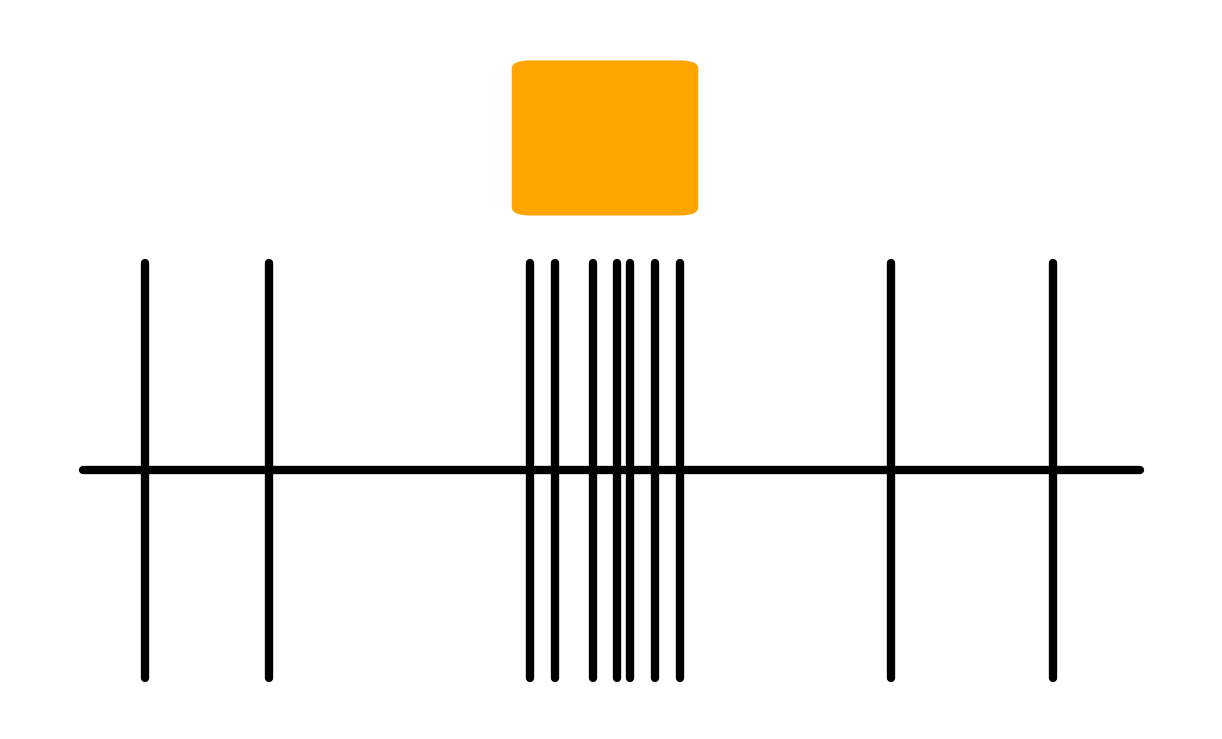

In [45]:
fig_name = 'burst_detection.svg'

flat_line_color = 'black'
spikes_color = 'black'
solid_capstyle = 'round'  # rounded lines
time_range = [0.5, 9]
burst_shaded_time_range = [4.1, 5.3]
spike_times = [1, 2, 4.1, 4.3, 4.6, 4.8, 4.9, 5.1, 5.3, 7, 8.3]
spike_height = 0.75

with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 3)
    ax.plot([time_range[0], time_range[1]], [spike_height/2, spike_height/2], color=flat_line_color, solid_capstyle=solid_capstyle)

    for spk in spike_times:

        ax.plot([spk, spk], [0, spike_height], color=spikes_color, solid_capstyle=solid_capstyle)
    
    rect = patches.FancyBboxPatch((burst_shaded_time_range[0], spike_height + 0.1), 
                             burst_shaded_time_range[1] - burst_shaded_time_range[0], 0.25, 
                             linewidth=1, edgecolor='None', facecolor='orange',
                                mutation_scale=0.5, mutation_aspect=0.1)

    
    ax.add_patch(rect)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Network burst

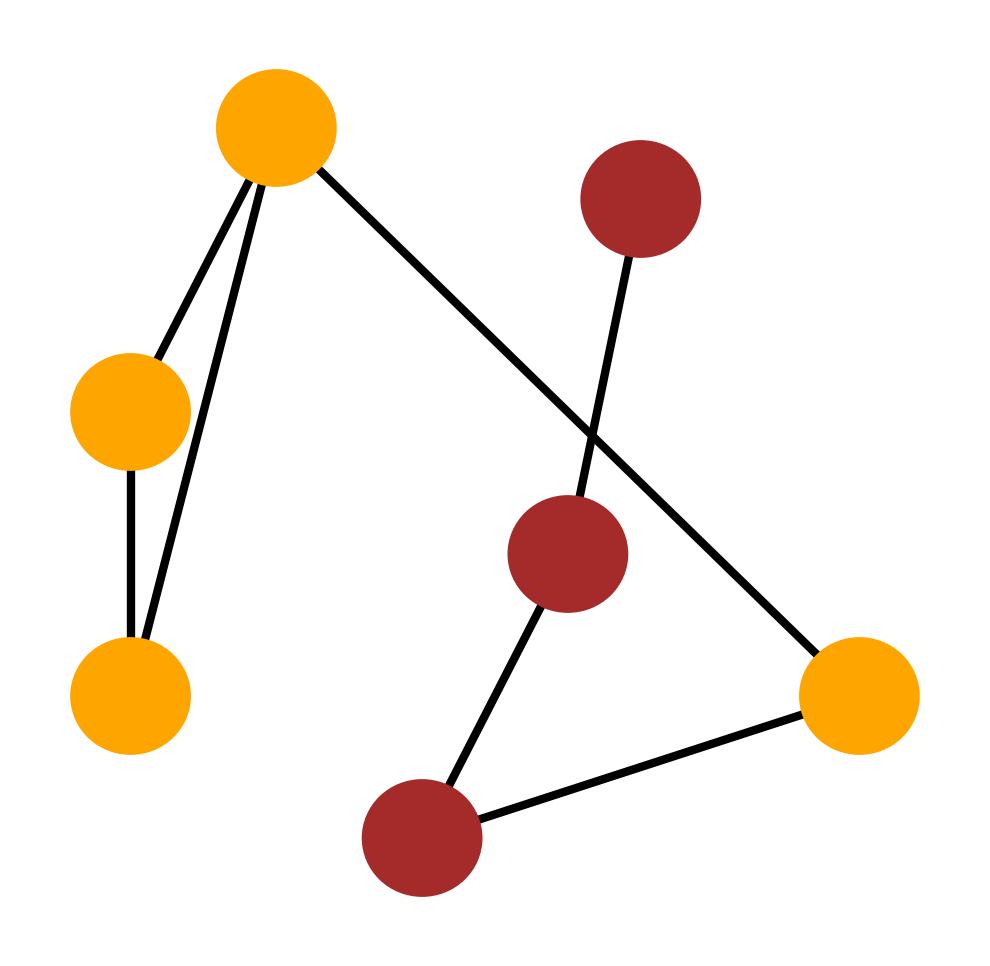

In [92]:
node_locations = [
    [0.3, 0.3], 
    [0.3, 0.5], 
    [0.4, 0.7], 
    [0.8, 0.3], 
    [0.5, 0.2], 
    [0.6, 0.4], 
    [0.65, 0.65]
]



node_groups = [
    0, 0, 0, 0, 1, 1, 1
]

node_radius = 0.04

num_nodes = len(node_locations)
adjacency_matrix = np.zeros((
    num_nodes, num_nodes
))

adjacency_matrix[0, 1] = 1 
adjacency_matrix[1, 2] = 1 
adjacency_matrix[2, 3] = 1 
adjacency_matrix[0, 2] = 1 

adjacency_matrix[3, 4] = 1 
adjacency_matrix[4, 5] = 1 
adjacency_matrix[5, 6] = 1 
            
with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4)

    for node_idx, node_loc in enumerate(node_locations):
        
        if node_groups[node_idx] == 0:
            color = 'orange'
        else:
            color = 'brown'

        circ = patches.Circle((node_loc[0], node_loc[1]), node_radius, color=color)
        ax.add_patch(circ)

    for adj_i in np.arange(num_nodes):
        for adj_j in np.arange(num_nodes):
            if adjacency_matrix[adj_i, adj_j] == 1:

                # draw connection 
                # print('Plotting edge from (%.2f %.2f) to (%.2f %.2f)' % (node_locations[adj_i][0], node_locations[adj_i][1],
                #                                              node_locations[adj_j][0], node_locations[adj_j][1])
                #       )
                ax.plot([node_locations[adj_i][0], node_locations[adj_j][0]],
                        [node_locations[adj_i][1], node_locations[adj_j][1]], color='black', zorder=-1)
                
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

In [71]:
[node_locations[adj_i][0], node_locations[adj_j][0]]

[0.65, 0.65]

In [73]:
[node_locations[adj_i][1], node_locations[adj_j][1]]

[0.65, 0.65]

# ISI within network burst

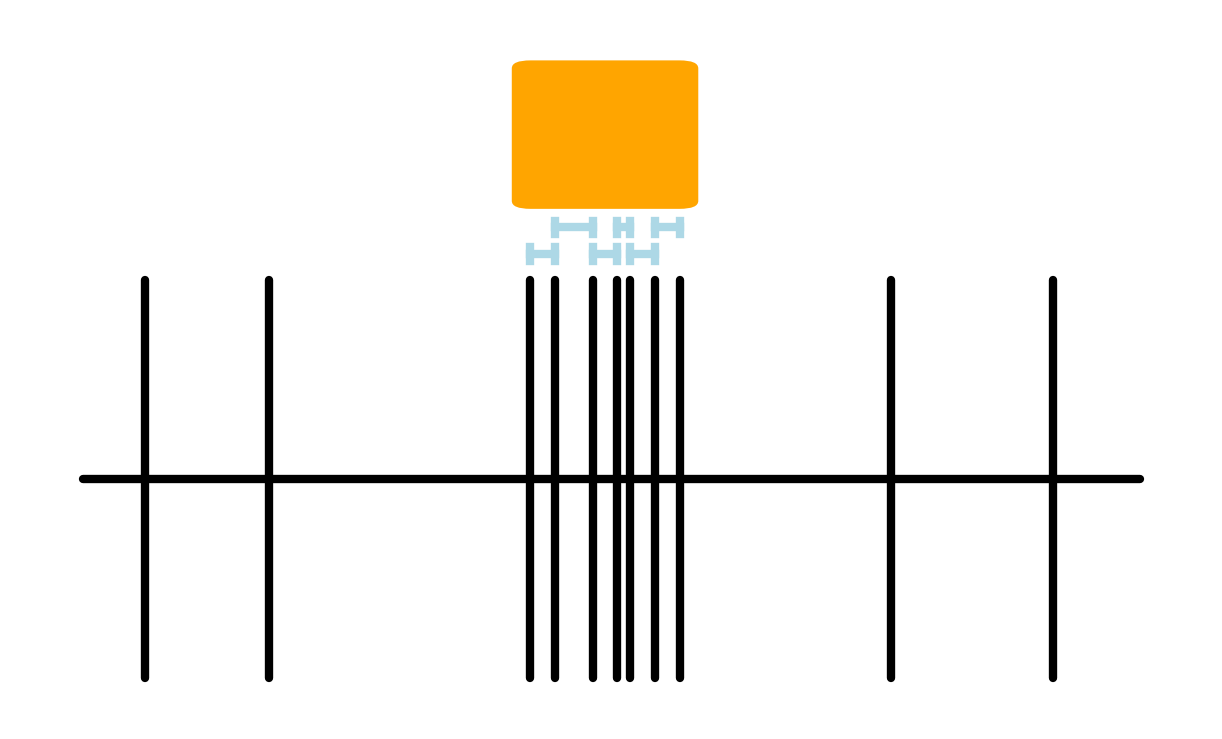

In [120]:
spike_times = np.array([1, 2, 4.1, 4.3, 4.6, 4.8, 4.9, 5.1, 5.3, 7, 8.3])
within_burst = [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
spike_height = 0.75

isi_heights = [0.8, 0.85]
isi_vert_height = 0.025

with plt.style.context(splstyle.get_style('nature-reviews')):

    
    fig, ax = plot_burst_trace(time_range=[0.5, 9], spike_times=spike_times, spike_height=spike_height,
                               burst_box_offset=0.15, fig=None, ax=None)
    
    n_isi = 0
    
    for spike_idx in np.arange(len(spike_times) - 1):
        
        if (within_burst[spike_idx] == 1) & (within_burst[spike_idx+1] == 1):
            
            if n_isi % 2 == 0:
                isi_height = isi_heights[0]
            else:
                isi_height = isi_heights[1]
            
            ax.plot([spike_times[int(spike_idx)], spike_times[int(spike_idx+1)]],
                     [isi_height, isi_height], color='lightblue')
            ax.plot([spike_times[int(spike_idx)], spike_times[int(spike_idx)]],
                     [isi_height-isi_vert_height/2, isi_height+isi_vert_height/2], color='lightblue')
            ax.plot([spike_times[int(spike_idx+1)], spike_times[int(spike_idx+1)]],
                     [isi_height-isi_vert_height/2, isi_height+isi_vert_height/2], color='lightblue')
            
            
            n_isi += 1

# STTC

In [20]:
import matplotlib as mpl


time_range = [0, 10]
y_range = [0, 1.5]

spike_train_A_y = 1
spike_train_B_y = 0.4
spike_lw = 3

spike_train_A_times = [1, 3, 3.2, 3.3, 5, 7]

spike_train_B_times = [1.4, 2, 2.9, 3.12, 3.6, 4.11, 4.34, 6.7]
within_tile = [1, 0, 1, 1, 1, 0, 0, 1]

spike_vert_height = 0.2
tile_y_offset = 0.05

time_lag = 0.5

with plt.style.context(splstyle.get_style('nature-reviews')): 
    
    plt.rc('text', usetex=True)
    # plt.rcParams['text.latex.preamble'].join([r"\usepackage{xcolor}"])
    # plt.rc('text.latex', preamble=r'\usepackage{xcolor}')
    pgf_with_latex = {
        "text.usetex": True,  
         "pgf.preamble": "\n".join([ # plots will use this preamble
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        r"\usepackage[detect-all,locale=DE]{siunitx}",
        r"\usepackage{xcolor}",
        ])
    }
    mpl.rcParams.update(pgf_with_latex)
           
    fig, ax = plt.subplots()
    
    for spike_t in spike_train_A_times:
        
        ax.plot([spike_t, spike_t], [spike_train_A_y - spike_vert_height/2, 
                                    spike_train_A_y + spike_vert_height/2], 
                color='black', lw=spike_lw)
        
        ax.plot([spike_t - time_lag, 
                spike_t + time_lag], 
                [spike_train_A_y - spike_vert_height/2 - tile_y_offset,
                 spike_train_A_y - spike_vert_height/2 - tile_y_offset], 
               color='blue', alpha=0.3, lw=5)
        
    
    for s_i, spike_t in enumerate(spike_train_B_times):
        
        if within_tile[s_i]:
            color = 'green'
        else:
            color = 'black'
        
        ax.plot([spike_t, spike_t], [spike_train_B_y - spike_vert_height/2, 
                                    spike_train_B_y + spike_vert_height/2], color=color, lw=spike_lw)
        
    
    ax.set_ylim(y_range)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    ax.text(0.8, 0.8, r'$T_A = \frac{\textcolor{blue}{S_A}}{T}$', transform=ax.transAxes)

RuntimeError: latex was not able to process the following string:
b'$T_A = \\\\frac{\\\\textcolor{blue}{S_A}}{T}$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/timothysit/.cache/matplotlib/tex.cache/def349559893f3979da152d5371a27ab.
tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file def349559893f3979da152d5371a27ab.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
<argument> \textcolor 
                      {blue}{S_A}
l.19 ...ily $T_A = \frac{\textcolor{blue}{S_A}}{T}
                                                  $}
No pages of output.
Transcript written on def349559893f3979da152d5371a27ab.log.




<Figure size 1800x1200 with 1 Axes>